In [283]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка и обработка данных

In [284]:
df = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [286]:
print('Количество дубликатов в датасете:', df[df.duplicated()].shape[0])

Количество дубликатов в датасете: 0


In [287]:
df.drop(columns=['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True) # Удаляем неинформативные признаки
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [288]:
# Проверим данные на наличие скрытых пропусков
for i in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']:
    print(f'Уникальные значение в столбце {i}: {df[i].unique()}')
    print()


Уникальные значение в столбце experience_level: ['MI' 'SE' 'EN' 'EX']

Уникальные значение в столбце employment_type: ['FT' 'CT' 'PT' 'FL']

Уникальные значение в столбце job_title: ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Dat

In [289]:
display(df['employee_residence'].value_counts().head(10))
print()
display(df['job_title'].value_counts().head(10))
print()
display(df['company_location'].value_counts().head(10))

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
Name: count, dtype: int64

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: count, dtype: int64

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: count, dtype: int64

В столбце employee_residence наблюдается более 30 различных стран. Так как данный признак можно использовать в своём анализе, то объединим все страны, у которых количество наблюдений 5 и менее в 1 блок - other.

Аналогичная ситуация со столбцом job_title, оставим только первые 4 группы, все остальное объединим в 1 блок - other

Также поступим и со столбцом company_location, оставим только первые 8 групп, все остальные объединим в 1 блок - other

In [290]:
df['employee_residence'] = df['employee_residence'].apply(lambda i: i if i in ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR', 'JP', 'PT', 'BR', 'PK'] else 'other')
df['job_title'] = df['job_title'].apply(lambda i: i if i in ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer '] else 'other')
df['company_location'] = df['company_location'].apply(lambda i: i if i in ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR'] else 'other')


In [291]:
display(df['employee_residence'].value_counts())
print()
display(df['job_title'].value_counts())
print()
display(df['company_location'].value_counts())

employee_residence
US       332
other     76
GB        44
IN        30
CA        29
DE        25
FR        18
ES        15
GR        13
JP         7
PK         6
PT         6
BR         6
Name: count, dtype: int64

job_title
other             235
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: count, dtype: int64

company_location
US       355
other     83
GB        47
CA        30
DE        28
IN        24
FR        15
ES        14
GR        11
Name: count, dtype: int64

In [292]:
# Преобразуем некоторые столбцы в категориальный тип данных
for i in ['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size', 'remote_ratio']:
    df[i] = df[i].astype('category')

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary_in_usd       607 non-null    int64   
 5   employee_residence  607 non-null    category
 6   remote_ratio        607 non-null    category
 7   company_location    607 non-null    category
 8   company_size        607 non-null    category
dtypes: category(8), int64(1)
memory usage: 11.6 KB


Категориальные признаки - все, кроме salary_in_usd

In [294]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.0,607,607,607,607.000000,607,607.0,607,607
unique,3.0,4,4,4,NaN,13,3.0,9,3
top,2022.0,SE,FT,other,NaN,US,100.0,US,M
freq,318.0,280,588,235,NaN,332,381.0,355,326
mean,NaN,NaN,NaN,NaN,112297.869852,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,70957.259411,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2859.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,62726.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,101570.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,150000.000000,NaN,NaN,NaN,NaN


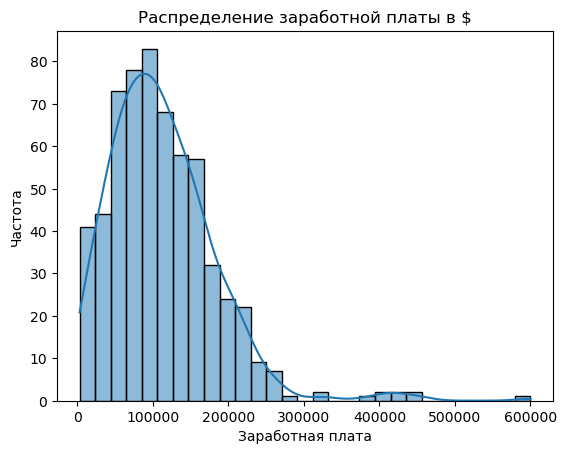

In [295]:
plt.title('Распределение заработной платы в $')
plt.xlabel('Заработная плата')
plt.ylabel('Частота')
sns.histplot(df['salary_in_usd'], kde=True);


In [296]:
# Меняем категории в столбцах на более читаемые
df['experience_level'] = df['experience_level'].cat.rename_categories({
    'EN': 'Entry-level',
    'MI': 'Mid-level', 
    'SE': 'Senior-level',
    'EX': 'Executive'
})

df['employment_type'] = df['employment_type'].cat.rename_categories({
    'PT': 'Part-time',
    'FT': 'Full-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

df['company_size'] = df['company_size'].cat.rename_categories({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

df['remote_ratio'] = df['remote_ratio'].cat.rename_categories({
    0: 'On-site',
    50: 'Hybrid',
    100: 'Remote'
})
# Словарь для расшифровки кодов стран
country_codes = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'DE': 'Germany',
    'FR': 'France',
    'IN': 'India',
    'CA': 'Canada',
    'ES': 'Spain',
    'GR': 'Greece',
    'JP': 'Japan',
    'PT': 'Portugal',
    'BR': 'Brazil',
    'PK': 'Pakistan',
    'other': 'Other Countries'
}

# Применяем расшифровку к обеим колонкам
df['employee_residence'] = df['employee_residence'].cat.rename_categories(country_codes)
df['company_location'] = df['company_location'].cat.rename_categories(country_codes)

**Первый анализ данных позволяет сделать ряд выводов:**
1) Пропусков в данных нет
2) Дубликатов в данных нет
3) Такие столбцы как Unnamed: 0, salary(общая выплаченная валовая сумма заработной платы) и salary_currency(валюта заработной платы) являются неиформативными, так как вся необходимая информация про зарплату представлена в столбце salary_in_usd (заработная плата в долларах США)
4) Некоторые из столбцов хоть и не помогут ответить на основные вопросы проекта, однако могут пригодится для поиска дополнительных закономерностей, оставляем их.
5) В столбце employee_residence, job_title, company_location уменьшили количество групп
6) Преобразовали некоторые столбцы в категориальный тип данных
7) Столбец salary_in_usd не выглядит как нормальное распределение, статистически подтвердим это далее

# 2. Визуальный анализ


Сделан базовый анализ для каждого признака, участвующего в исследовании:

для числовых признаков построены гистограммы, иллюстрирующие распределения;

для категориальных признаков определено количество записей для каждой категории и построены соответствующие визуализации.

Студент создал корректные визуализации, которые демонстрируют влияние каждого из признаков, участвующих в исследовании, на зарплату по всем наименованиям Data Scientist или на зарплату по всем должностям.

Студент на основе визуального анализа дал первичные ответы на поставленный в задании вопрос: «Какие факторы влияют на заработную плату?».

In [297]:
df['company_location'].unique()

['Germany', 'Other Countries', 'United Kingdom', 'United States', 'France', 'India', 'Greece', 'Canada', 'Spain']
Categories (9, object): ['Canada', 'Germany', 'Spain', 'France', ..., 'Greece', 'India', 'United States', 'Other Countries']

In [298]:
df['employee_residence'].unique()

['Germany', 'Japan', 'United Kingdom', 'Other Countries', 'United States', ..., 'Portugal', 'Greece', 'Canada', 'Spain', 'Brazil']
Length: 13
Categories (13, object): ['Brazil', 'Canada', 'Germany', 'Spain', ..., 'Pakistan', 'Portugal', 'United States', 'Other Countries']

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary_in_usd       607 non-null    int64   
 5   employee_residence  607 non-null    category
 6   remote_ratio        607 non-null    category
 7   company_location    607 non-null    category
 8   company_size        607 non-null    category
dtypes: category(8), int64(1)
memory usage: 11.6 KB


**Базовый визуальный анализ каждого признака**

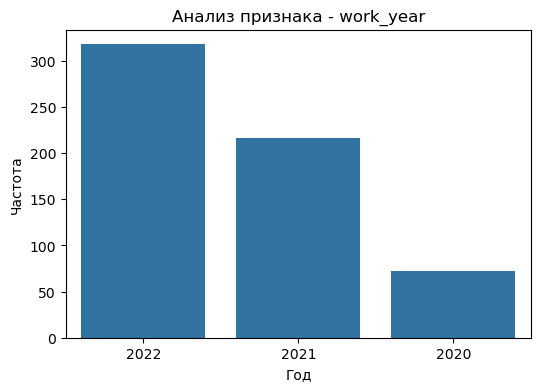

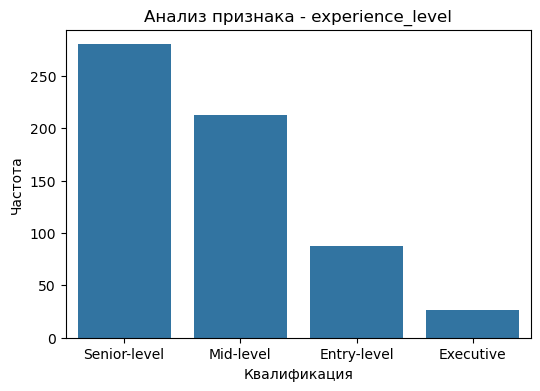

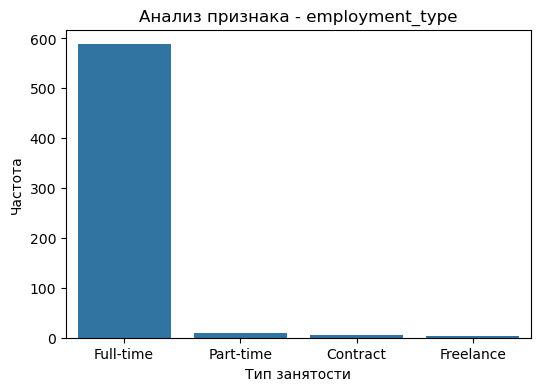

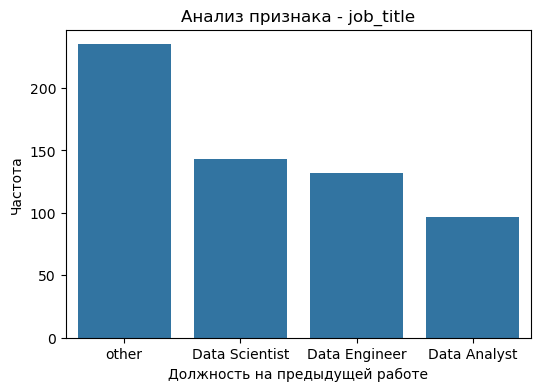

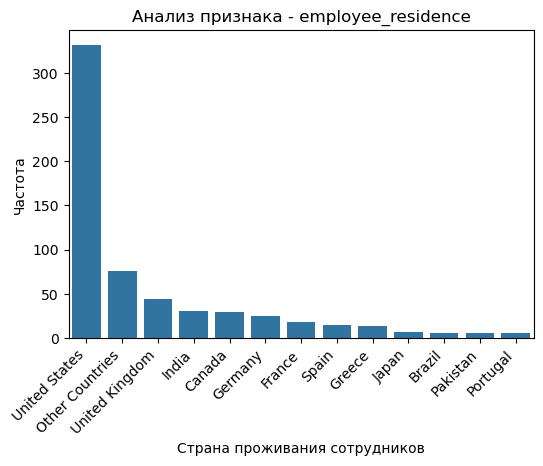

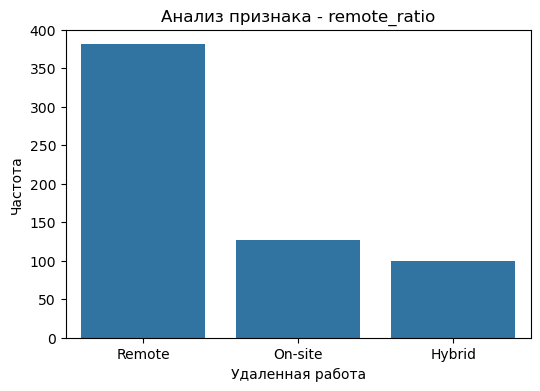

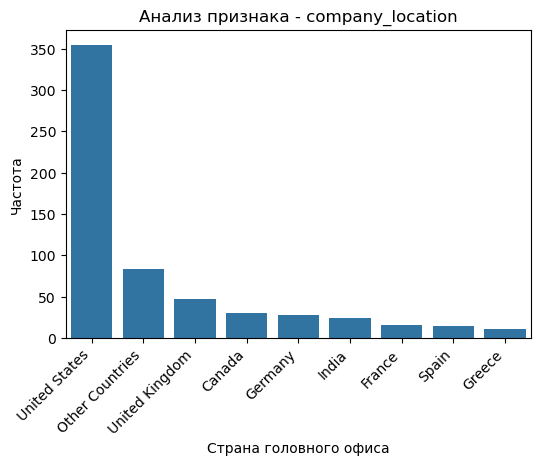

In [300]:
list_name_of_columns = ['work_year','experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio','company_location', 'company_size']
list_name_of_x_labels = ['Год', 'Квалификация', 'Тип занятости', 'Должность на предыдущей работе', 'Страна проживания сотрудников', 'Удаленная работа', 'Страна головного офиса', 'Размер компании']
for i in range(0, 7):
    if list_name_of_columns[i] in ['employee_residence', 'company_location']:
        plt.figure(figsize=(6, 4))
        plt.title(f'Анализ признака - {list_name_of_columns[i]}')
        plt.xlabel(f'{list_name_of_x_labels[i]}')
        plt.ylabel('Частота')
        plt.xticks(rotation=45, ha='right')
        sns.countplot(df, x=list_name_of_columns[i], order=df[list_name_of_columns[i]].value_counts().index);
    else:
        plt.figure(figsize=(6, 4))
        plt.title(f'Анализ признака - {list_name_of_columns[i]}')
        plt.xlabel(f'{list_name_of_x_labels[i]}')
        plt.ylabel('Частота')
        sns.countplot(df, x=list_name_of_columns[i], order=df[list_name_of_columns[i]].value_counts().index);
    

<Axes: xlabel='Заработная плата'>

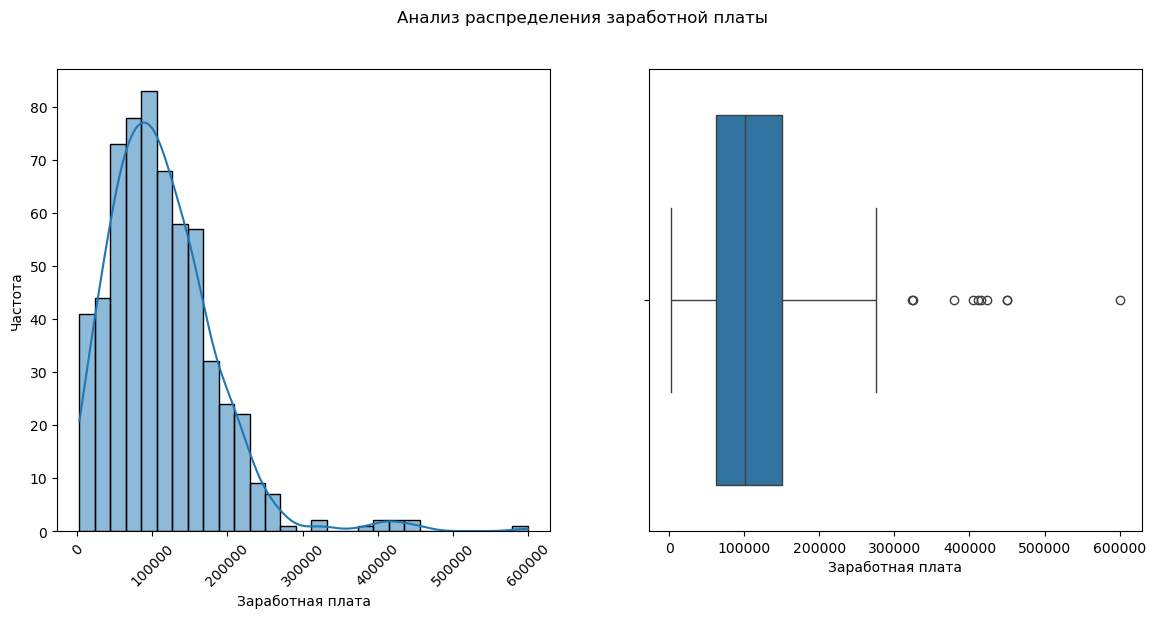

In [301]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('Анализ распределения заработной платы')
axes[0].set_ylabel('Частота')
axes[0].set_xlabel('Заработная плата')
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(df['salary_in_usd'], kde=True, ax=axes[0])

axes[1].set_xlabel('Заработная плата')
sns.boxplot(df['salary_in_usd'], ax=axes[1], orient='h')

**Отличаются ли медианные заработные платы в зависимости от года?**

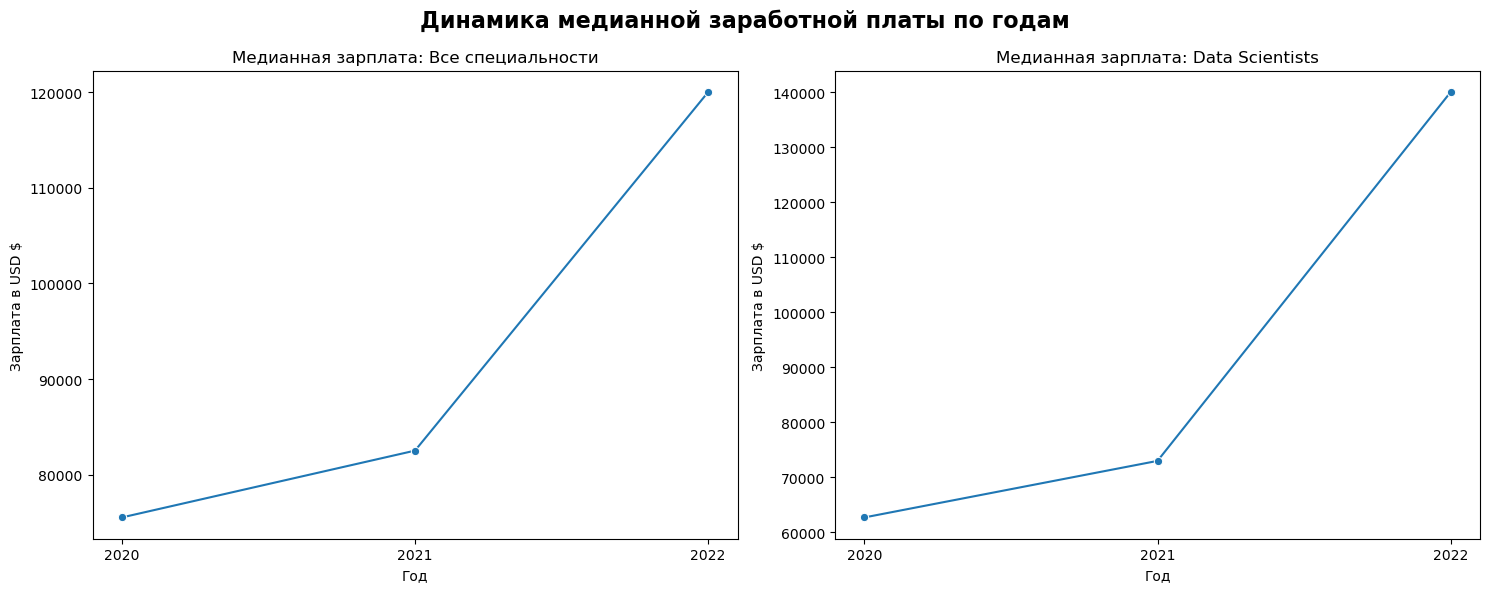

In [335]:
# Готовим данные для графиков
years_data = df.groupby('work_year', observed=False)['salary_in_usd'].median()
filt_data_science = df[df['job_title'] == 'Data Scientist']
years_data_science = filt_data_science.groupby('work_year', observed=False)['salary_in_usd'].median()

# Первый график
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.lineplot(y=years_data.values, x=years_data.index, ax=axes[0], marker='o')
axes[0].set_xticks([2020, 2021, 2022])
axes[0].set_title('Медианная зарплата: Все специальности')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Зарплата в USD $')


# Второй график
sns.lineplot(y=years_data_science.values, x=years_data_science.index, ax=axes[1], marker='o')
axes[1].set_xticks([2020, 2021, 2022])
axes[1].set_title('Медианная зарплата: Data Scientists')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Зарплата в USD $')


fig.suptitle('Динамика медианной заработной платы по годам', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

